# PROJETO MÓDULO I - Data Science Aplicada

***

## Python e pandas para análise de dados reais


    O projeto do módulo I do Bootcamp Data Science aplicada promovida pela Alura consiste em analisar dados da saúde disponíveis no DATASUS (departamento de informática do Sistema Único de Saúde do Brasil.) 
    
    A temática de análise (escolha pessoal) será o dataset de casos diagnosticados de AIDS (seção: Epidemiológicas e Morbidade) - Casos de AIDS notificados no SINAN, declarados no SIM e registrados no SISCEL/SICLOM por ano de diagnóstico

													
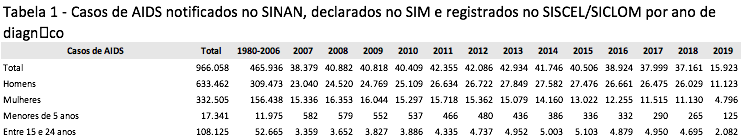

## Lógica de análise

**1.** Os dados analisados se referem a soma de casos diagnosticados no SINAN, declarados no SIM e registrados no SISCEL/SICLOM por ano de diagnóstico.

**2.** O objetivo I é analisar o comportamento da epidemia desde o primeiro caso diagnosticado no Brasil até o ano de 2019


***

**SIGNIFICADO DE SIGLAS E ACRÔNIMOS**

**1.** DATASUS: departamento de informática do Sistema Único de Saúde do Brasil.

**2.** SINAN: Sistema de Informação de Agravos de Notificação

**3.** SIM: Sistema de Informação sobre Mortalidade 

**4.** SISCEL: Sistema de Controle de Exames Laboratoriais de CD4+/CD8+ e Carga Viral do HIV

**5.** Sistema de Controle Logístico de Medicamentos

***

**REFERÊNCIAS**

**1.** Dataset utilizado: <a href="https://datasus.saude.gov.br/acesso-a-informacao/casos-de-aids-desde-1980-sinan/"> DATASUS </a>

**2.** Programa das Nações Unidas focado em ajudar nações no combate à AIDS: <a href="https://unaids.org.br/"> UNAIDS </a>

**3.** História de AIDS no Brasil: <a href="http://www.aids.gov.br/pt-br/centrais-de-conteudos/historia-aids-linha-do-tempo"> AIDS.GOV </a>



# ANÁLISE - CASOS DA AIDS DIAGNOSTICADOS NO BRASIL

## Importação das Bibliotecas

In [48]:
import pandas            as pd
import seaborn           as sns
import numpy             as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')


## Cronologia

Abaixo consta a cronologia da doença desde os primeiros casos em 1977 até 2017.

As informações foram retiradas do site AIDS.GOV e não há registros de 1992 à 2012.
Nota-se fortes ações do Estado como de ONG's e organizações mundiais para conter a doença, o que foi primordial para a redução de contaminações do vírus HIV e o desenvolvimento da AIDS.

<img src="https://i.ibb.co/GTw8F7y/Data-Science.jpg" alt="Data-Science" width="1132" height="882" data-load="full" style="">

## Análise dos Dados

In [10]:
# importação do dataset
df = pd.read_csv('HIV-AIDS.csv',thousands = '.')
df

,Fx. Etária(SINAN),1980,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,< 1 ano,0,2,0,4,6,1,29,60,63,...,280,228,207,192,176,148,147,127,59,7944
1,1-4,0,0,0,3,3,8,21,41,56,...,217,282,260,216,186,203,180,157,68,9940
2,5-9,0,0,0,1,5,6,12,16,25,...,164,123,122,117,95,77,77,76,43,5242
3,10-14,0,1,0,3,6,9,21,27,39,...,192,161,145,112,90,80,76,68,32,3500
4,15-19,0,0,1,6,27,49,127,209,245,...,804,895,983,1033,1025,970,899,794,323,19934
5,20-34,1,10,26,64,259,588,1481,2411,3355,...,16837,16964,17408,16842,16381,15544,15677,15016,6706,422557
6,35-49,0,2,12,42,188,379,820,1291,1807,...,17223,16594,16498,15959,15236,14659,13810,13760,5800,370308
7,50-64,0,2,2,7,32,70,155,241,366,...,5812,5988,6309,6325,6295,6206,6040,6020,2469,110204
8,65-79,0,0,0,1,2,2,25,37,43,...,775,791,940,881,962,967,1019,1061,396,15305
9,80 e mais,0,0,0,1,0,0,2,1,3,...,51,59,62,69,60,70,74,82,27,926


In [7]:
# conferindo manualmente se os valores estão corretos (conforme dados no site do SINAN)
print(df.T[28:29].sum().sum())
print(df.T[30:31].sum().sum())

40882.0
40409.0


In [16]:
#Renomeando a coluna para facilitar as análises
df.rename(columns={'Fx. Etária(SINAN)' : 'fx_idade'}, inplace = True)
df.head(2)

,fx_idade,1980,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,< 1 ano,0,2,0,4,6,1,29,60,63,...,280,228,207,192,176,148,147,127,59,7944
1,1-4,0,0,0,3,3,8,21,41,56,...,217,282,260,216,186,203,180,157,68,9940


### VISUALIZAÇÃO

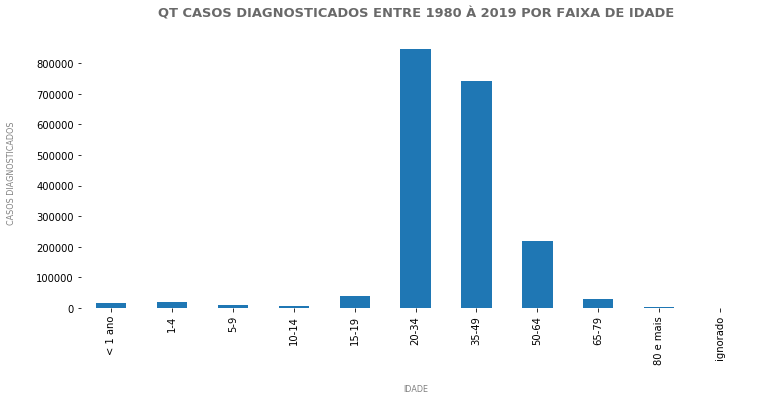

In [54]:

s2 = df.set_index('fx_idade').T.sum().plot(kind = 'bar', figsize=(12, 5))

s2 = plt.title('QT CASOS DIAGNOSTICADOS ENTRE 1980 À 2019 POR FAIXA DE IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

#s2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)


Jovens entre 20 - 34 anos foram o grupo com maior casos diagnosticados, seguido pelo grupo de de 35 à 49 anos.
As idades entre 20 - 49 anos são as que concentram maior quantidade de casos de AIDS

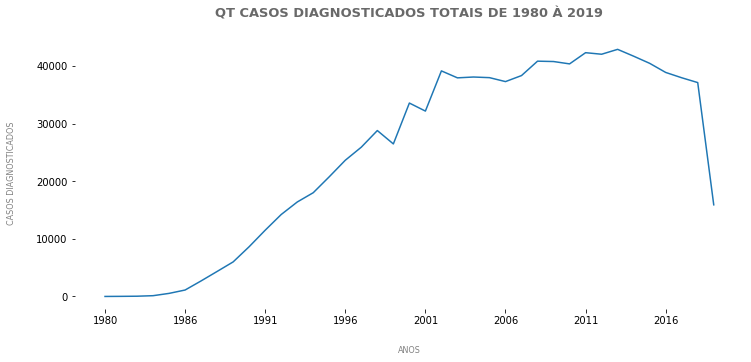

In [47]:

df.drop(['fx_idade', 'Total'], axis = 1).sum().plot(figsize=(12,5))

s2 = plt.title('QT CASOS DIAGNOSTICADOS TOTAIS DE 1980 À 2019',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)


Os anos 2000 até meados de 2012 concentram o pico da doença, com forte queda a partir de 2016